### Task 1: Financial market and Labor data analysis 

Questions: Is there a correlation between the unemployment rate and the four popular market ETFs? Can we predict the unemployment rate based on market data?

Work algorithm:\
1.download unemployment data \
2.download ETF data \
3.explore datasets \
4.mothly average labor and market data \
5.build a simple ML model

Answers: A1. There is no correlation between labor and ETF data. A2. The labor dataset is monthly and, therefore, size limited. The simple decision tree model works well, but it cannot be used to draw any meaningful conclusions due to data shortage. Further modifications, like adding more datasets, and additional analysis are needed.   

Author: Elchin Jafarov 

Date: 04/04/21

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [50]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

First let's download the data from the Department of Labour. NOTE: the request allow only 10 year data chunks

In [192]:
import requests
import json
import prettytable

#https://data.bls.gov/cgi-bin/surveymost?bls

#    Civilian Labor Force (Seasonally Adjusted) - LNS11000000 
#    Civilian Employment (Seasonally Adjusted) - LNS12000000 
#    Civilian Unemployment (Seasonally Adjusted) - LNS13000000 
#    Unemployment Rate (Seasonally Adjusted) - LNS14000000 
    
def read_labor_dep_data(ds_code,b_time,e_time):
    headers = {'Content-type': 'application/json'}
    data = json.dumps({"seriesid": [ds_code]
                       ,"startyear":b_time, "endyear":e_time})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    for series in json_data['Results']['series']:
        x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
        seriesId = series['seriesID']
        my_year=[]
        my_period=[]
        my_value=[]
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            my_year.append(year)
            my_period.append(period)
            my_value.append(value)
            footnotes=""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                x.add_row([seriesId,year,period,value,footnotes[0:-1]])
        output = open(seriesId + '.txt','w')
        output.write (x.get_string())
        output.close()
        
        ds = {'year': my_year,
              'month': my_period,
              'value': my_value }
        df = pd.DataFrame(ds)
        df.head()
        
        return df

df_unemployement_rate=read_labor_dep_data('LNS14000000',"2000","2010")
df_unemployement=read_labor_dep_data('LNS13000000',"2000","2010")
df_unemployement_rate_1=read_labor_dep_data('LNS14000000',"2010","2020")
df_unemployement_1=read_labor_dep_data('LNS13000000',"2010","2020")
df_unemployement_rate_2=read_labor_dep_data('LNS14000000',"2020","2021")
df_unemployement_2=read_labor_dep_data('LNS13000000',"2020","2021")

In [197]:
print (df_unemployement_rate.head(1))
print (df_unemployement_rate.tail(1))
print (df_unemployement_rate_1.head(1))
print (df_unemployement_rate_1.tail(1))
print (df_unemployement_rate_2.head(1))
print (df_unemployement_rate_2.tail(1))

   year month value
0  2009   M12   9.9
     year month value
119  2000   M01   4.0
   year month value
0  2019   M12   3.6
     year month value
119  2010   M01   9.8
   year month value
0  2021   M03   6.0
    year month value
14  2020   M01   3.5


The datasets were saved in the reverese order. Reverse the order and saved rates as a whole array.

In [278]:
[n1,m]=df_unemployement_rate.shape
[n2,m]=df_unemployement_rate_1.shape
[n3,m]=df_unemployement_rate_2.shape
reverse1 = np.arange(n1)
reverse2 = np.arange(n2)
reverse3 = np.arange(n3)

unemploy_rate=np.zeros(n1+n2+n3+1)
unemploy=np.zeros(n1+n2+n3+1)
count=0

for i in reverse1[::-1]:
    unemploy_rate[count]=df_unemployement_rate["value"][i]
    unemploy[count]=df_unemployement["value"][i]
    count+=1
    
for i in reverse2[::-1]:
    unemploy_rate[count]=df_unemployement_rate_1["value"][i]
    unemploy[count]=df_unemployement_1["value"][i]
    count+=1
    
for i in reverse3[::-1]:
    unemploy_rate[count]=df_unemployement_rate_2["value"][i]
    unemploy[count]=df_unemployement_2["value"][i]
    count+=1
    
print(unemploy_rate.shape)
print(unemploy.shape)

(256,)
(256,)


In [149]:
xle=wb.DataReader('XLE',start='2000-1-1',data_source='yahoo')#oil and gas etf
print(xle.head(1))
dia=wb.DataReader('DIA',start='2000-1-1',data_source='yahoo')#industrial index
print(dia.head(1))
spy=wb.DataReader('SPY',start='2000-1-1',data_source='yahoo') #S&P500 etf
print(spy.head(1))
xlv=wb.DataReader('XLV',start='2000-1-1',data_source='yahoo') #healthcare etf
print(xlv.head(1))

               High     Low     Open    Close    Volume  Adj Close
Date                                                              
2000-01-03  27.3125  26.375  27.3125  26.5625  380300.0  16.015915
                 High    Low       Open  Close     Volume  Adj Close
Date                                                                
2000-01-03  116.03125  113.0  116.03125  113.5  1278800.0  70.643761
              High      Low    Open     Close     Volume  Adj Close
Date                                                               
2000-01-03  148.25  143.875  148.25  145.4375  8164300.0  97.825676
            High      Low  Open      Close    Volume  Adj Close
Date                                                           
2000-01-03  31.0  30.0625  31.0  30.296875  246700.0  22.154699


quick plotting of the data

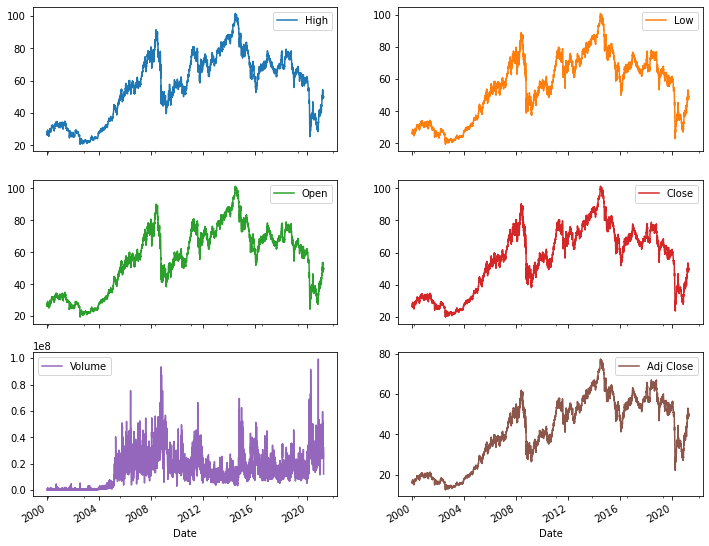

In [150]:
xle.plot(subplots=True, layout=(3,2),figsize=(12, 10)); # health care etf

The data includes 6 columns, 5 of which are somewhat similar. Here I will be using the "Adj Close" and "Volume". 

In [153]:
xle.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,27.31250,26.3750,27.3125,26.562500,380300.0,16.015915
2000-01-04,26.31250,25.8750,26.3125,26.062500,722200.0,15.714444
2000-01-05,26.75000,26.0000,26.1250,26.750000,337800.0,16.128975
2000-01-06,27.84375,26.7500,26.7500,27.781250,133100.0,16.750763
2000-01-07,28.40625,27.6875,27.6875,28.078125,468000.0,16.929771


In [175]:
ds_all = {'xle.high': xle["High"],
      'xle.low': xle["Low"],
      'xle.volume': xle["Volume"],
      'dia.high': dia["High"],
      'dia.low': dia["Low"],
      'dia.volume': dia["Volume"],
      'spy.high': spy["High"],
      'spy.low': spy["Low"],
      'spy.volume': spy["Volume"],
      'xlv.high': xlv["High"],
      'xlv.low': xlv["Low"],
      'xlv.volume': xlv["Volume"] }
df_all = pd.DataFrame(ds_all)
df_all.head()

ds_close = {'xle': xle["Adj Close"],
          'dia': dia["Adj Close"],
          'spy': spy["Adj Close"],
          'xlv': xlv["Adj Close"] }
df_close = pd.DataFrame(ds_close)
df_close.head()
            
ds_volume = {'xle': xle["Volume"],
          'dia': dia["Volume"],
          'spy': spy["Volume"],
          'xlv': xlv["Volume"] }
df_volume = pd.DataFrame(ds_volume)
df_volume.head()

,xle,dia,spy,xlv
Date,,,,
2000-01-03,380300.0,1278800.0,8164300.0,246700.0
2000-01-04,722200.0,1535700.0,8089800.0,35300.0
2000-01-05,337800.0,2007000.0,12177900.0,137600.0
2000-01-06,133100.0,2639500.0,6227200.0,50000.0
2000-01-07,468000.0,3767400.0,8066500.0,22100.0


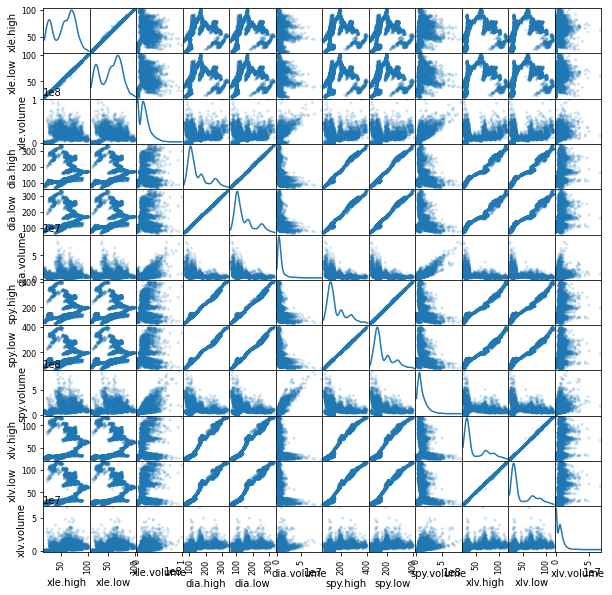

In [172]:
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal="kde");

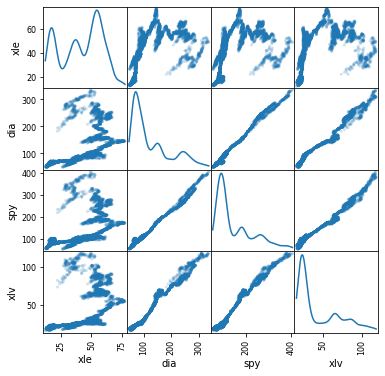

In [177]:
scatter_matrix(df_close, alpha=0.2, figsize=(6, 6), diagonal="kde");

dia, spy, and xlv are somewhat similar, that is why there are correlated.  

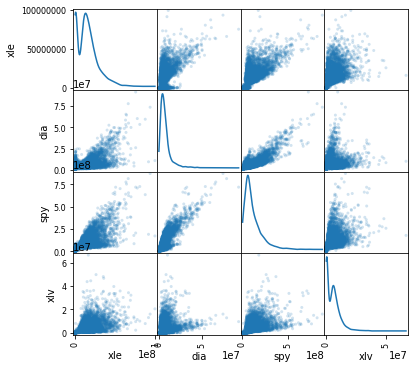

In [178]:
scatter_matrix(df_volume, alpha=0.2, figsize=(6, 6), diagonal="kde");

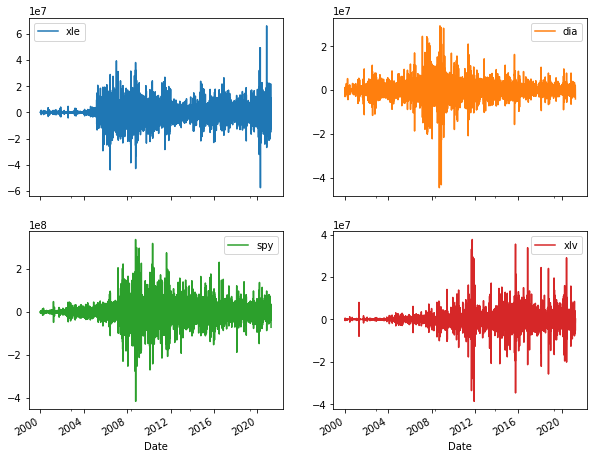

In [267]:
df_volume.diff().plot(subplots=True, layout=(2,2),figsize=(10, 8)); 

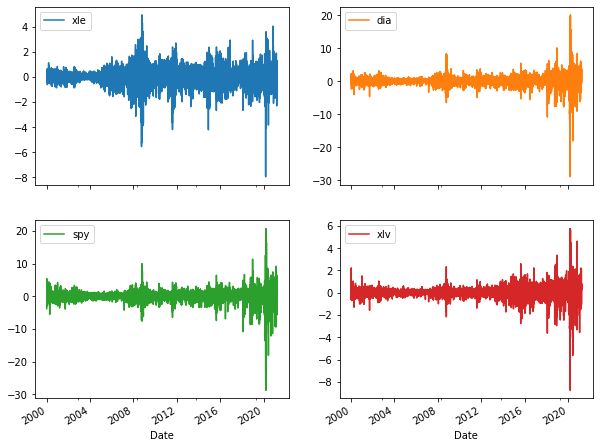

In [268]:
df_close.diff().plot(subplots=True, layout=(2,2),figsize=(10, 8)); # health care etf

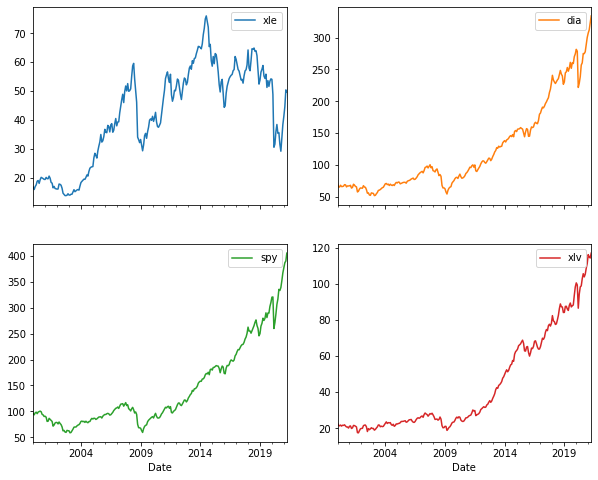

In [272]:
df_close.resample('1m',label='right').mean().plot(subplots=True, layout=(2,2),figsize=(10, 8));

In [273]:
df_close_monthly=df_close.resample('1m',label='right').mean()
df_close_monthly['unepmloy']=unemploy
df_close_monthly['unepmloy_rate']=unemploy_rate
df_close_monthly.shape

(256, 4)

In [289]:
df_volume_monthly=df_volume.resample('1m',label='right').mean()
df_volume_monthly['unepmloy']=unemploy
df_volume_monthly['unepmloy_rate']=unemploy_rate
df_volume_monthly.shape

(256, 6)

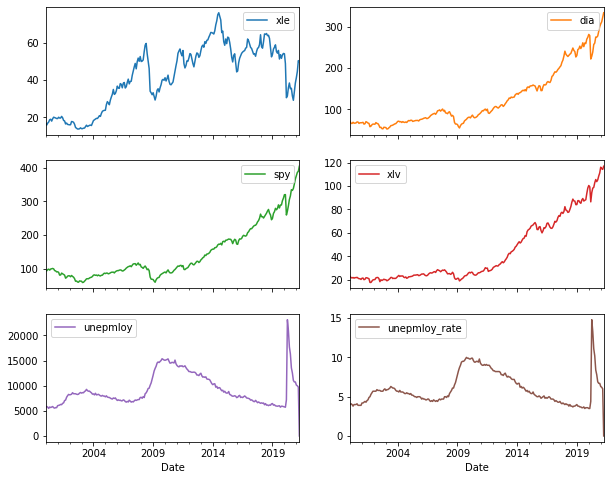

In [284]:
df_close_monthly.plot(subplots=True, layout=(3,2),figsize=(10, 8));

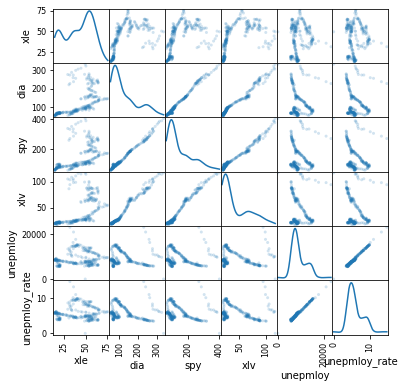

In [287]:
scatter_matrix(df_close_monthly, alpha=0.2, figsize=(6, 6), diagonal="kde");

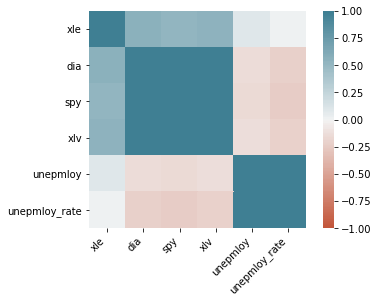

In [309]:
import seaborn as sns
corr = df_close_monthly.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

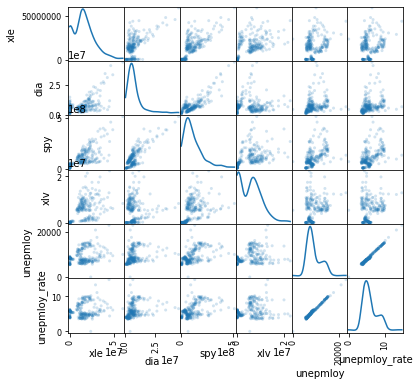

In [290]:
scatter_matrix(df_volume_monthly, alpha=0.2, figsize=(6, 6), diagonal="kde");

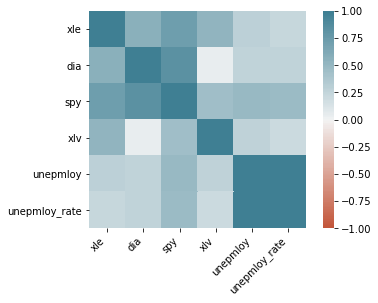

In [310]:
corr = df_volume_monthly.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Let's build the regression model for monthy volume and monthly close datasets 

count    256.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: unepmloy_rate, dtype: float64


Text(0, 0.5, 'predicted-truth')

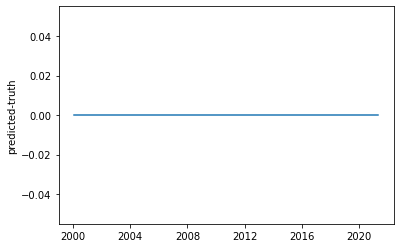

In [306]:
from sklearn.tree import DecisionTreeRegressor

feature_names = [ 'xle','dia','spy','xlv']

X = df_volume_monthly[feature_names]
y = df_volume_monthly.unepmloy_rate
unepmloy_rate_vol_model = DecisionTreeRegressor(random_state=1)

# Fit the model
unepmloy_rate_vol_model.fit(X, y)
predictions = unepmloy_rate_vol_model.predict(X)
error=predictions-y
print (error.describe())
plt.plot(error)
plt.ylabel('predicted-truth')

count    2.560000e+02
mean     1.040834e-17
std      6.731716e-17
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.440892e-16
Name: unepmloy_rate, dtype: float64


Text(0, 0.5, 'predicted-truth')

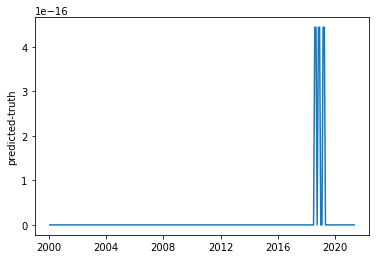

In [307]:
X = df_close_monthly[feature_names]
y = df_close_monthly.unepmloy_rate
unepmloy_rate_close_model = DecisionTreeRegressor(random_state=1)

# Fit the model
unepmloy_rate_close_model.fit(X, y)
predictions = unepmloy_rate_close_model.predict(X)
error=predictions-y
print (error.describe())
plt.plot(error)
plt.ylabel('predicted-truth')